In [29]:
"""
Program Name: MonteCarlo_GroupA.ipynb
Subject: SIF3012 Computational Physics
Assignment Title: Monte Carlo Integration and Convergence Analysis
Group: Group A
Date of Creation: Thursday, 8th December 2026

Group Members:
- Lim Huey Wen (23005873)
- Loh Jiang Joe (23006181)
- Gan Ng Hee (23005870)
- Tee Hui En (23005825)
- Tan Yee Tern (23006131)
"""

'\nProgram Name: MonteCarlo_GroupA.ipynb\nSubject: SIF3012 Computational Physics\nAssignment Title: Monte Carlo Integration and Convergence Analysis\nGroup: Group A\nDate of Creation: Thursday, 8th December 2026\n\nGroup Members:\n- Lim Huey Wen (23005873)\n- Loh Jiang Joe (23006181)\n- Gan Ng Hee (23005870)\n- Tee Hui En (23005825)\n- Tan Yee Tern (23006131)\n'

In [30]:
"""
• Compute 2D integral of assigned function f(x, y) over [0,1] × [0,1]  
• Use Monte Carlo sampling to estimate the integral  
• Increase sample size N to study convergence behavior  
• Quantify statistical uncertainty (expected ~1/√N scaling)  
• Compare Monte Carlo estimate with exact analytical value  
• Comment on how the integrand’s structure affects convergence and accuracy
"""

'\n• Compute 2D integral of assigned function f(x, y) over [0,1] × [0,1]  \n• Use Monte Carlo sampling to estimate the integral  \n• Increase sample size N to study convergence behavior  \n• Quantify statistical uncertainty (expected ~1/√N scaling)  \n• Compare Monte Carlo estimate with exact analytical value  \n• Comment on how the integrand’s structure affects convergence and accuracy\n'

---Results---
Exact Reult (dblquad): 0.40528473
Monte Carlo Result: 0.40278044 ± 0.00294150


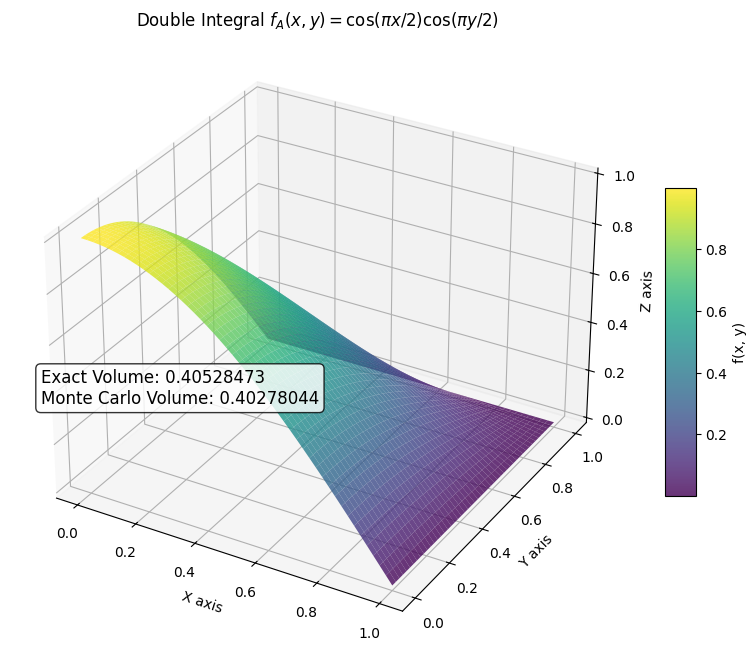

In [31]:
# Question 1: Plot the Monte Carlo estimate of the integral as a function of N

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import dblquad

# Define function fA(x, y)
def fA(x, y): 
    return np.cos(np.pi * x / 2) * np.cos(np.pi * y / 2)

# Define limits 
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0

# Calculation 

# 1. Analytical/Exact Calculation
exact_result, error_est = dblquad(lambda y, x: fA(x,y), x_min, x_max, lambda x: y_min, lambda x: y_max)

# Step 2: Monte Carlo Integration
N = 10000 # Number of random samples 

# Step 3: Generate random points covering the rectangular floor
x_samples = np.random.uniform(low=x_min, high=x_max, size=N)
y_samples = np.random.uniform(low=y_min, high=y_max, size=N)

# Step 4: Calculate heights at these random points
z_values = fA(x_samples, y_samples)

# Step 5: Calculate Volume = (Average Height) * (Area of Base)
domain_area = (x_max - x_min) * (y_max - y_min)
monte_carlo_result = z_values.mean() * domain_area

# Step 6: Calculate Error (Standard Deviation)
monte_carlo_error = np.std(z_values * domain_area) / np.sqrt(N)

# Step 7: Print result to console
print(f"---Results---")
print(f"Exact Reult (dblquad): {exact_result:.8f}")
print(f"Monte Carlo Result: {monte_carlo_result:.8f} ± {monte_carlo_error:.8f}")

"""
3D Visualisation
"""
# Create a grid for plotting the smooth surface
x_grid = np.linspace(x_min, x_max, 50)
y_grid = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(x_grid, y_grid)
Z = fA(X, Y)

# Setup figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Add result text directly onto the plot
result_text = (
    f"Exact Volume: {exact_result:.8f}\n"
    f"Monte Carlo Volume: {monte_carlo_result:.8f}"
)
# Place text in 3D space (anchored somewhat arbitrarily in the visible area)
ax.text2D(0.05, 0.4, result_text, transform=ax.transAxes, fontsize=12,
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Labels and Colorbar
ax.set_title(r'Double Integral $f_A(x, y) = \cos(\pi x/2)\cos(\pi y/2)$')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
fig.colorbar(surf, shrink=0.5, aspect=10, label='f(x, y)')
plt.savefig('Monte_Carlo_double_integral.png')

plt.show()



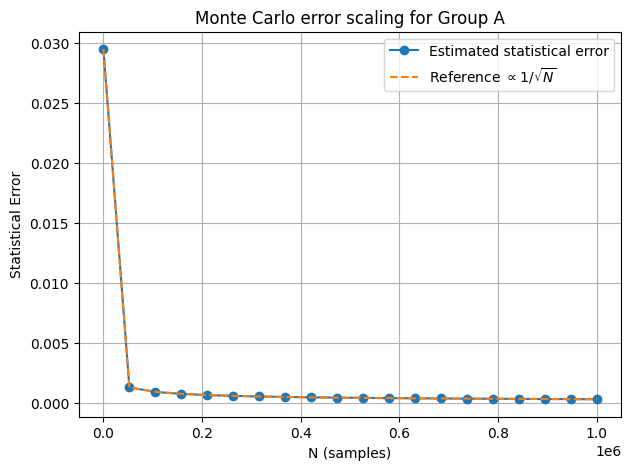

In [32]:
# Question 2: Estimate the statistical error and verify the expected 1/√N scaling

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Define Group A function
def fA(x, y): 
    return np.cos(np.pi * x / 2) * np.cos(np.pi * y / 2)

# Domain limits
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
domain_area = (x_max - x_min) * (y_max - y_min)

# Exact analytical result
exact_result = (2/np.pi)**2

# Sample sizes
Ns = np.linspace(100, 10**6, 20, dtype=int)   # 1e2 ... 1e6
estimates, std_errors, abs_errors = [], [], []

for N in Ns:
    # Random samples
    x_samples = np.random.uniform(x_min, x_max, N)
    y_samples = np.random.uniform(y_min, y_max, N)

    # Evaluate function
    f_values = fA(x_samples, y_samples)

    # Monte Carlo estimate
    I = domain_area * np.mean(f_values)

    # Standard error of the mean (scaled by area)
    se = domain_area * np.std(f_values) / np.sqrt(N)

    estimates.append(I)
    std_errors.append(se)
    abs_errors.append(abs(I - exact_result))

# Convert to arrays
estimates = np.array(estimates)
std_errors = np.array(std_errors)
abs_errors = np.array(abs_errors)

# --- Plot statistical error vs N ---
plt.figure(figsize=(7,5))
plt.plot(Ns, std_errors, 'o-', label='Estimated statistical error')

# Reference line showing 1/sqrt(N) scaling
ref = std_errors[0] * np.sqrt(Ns[0] / Ns)
plt.plot(Ns, ref, '--', label=r'Reference $\propto 1/\sqrt{N}$')

plt.xlabel('N (samples)')
plt.ylabel('Statistical Error')
plt.title('Monte Carlo error scaling for Group A')
plt.legend()
plt.grid(True)
plt.show()

--- Question 3 Results ---
Pilot I0 = 0.405343
Pilot relative error = 0.072221%
Estimated N for ~1% relative error = 5216


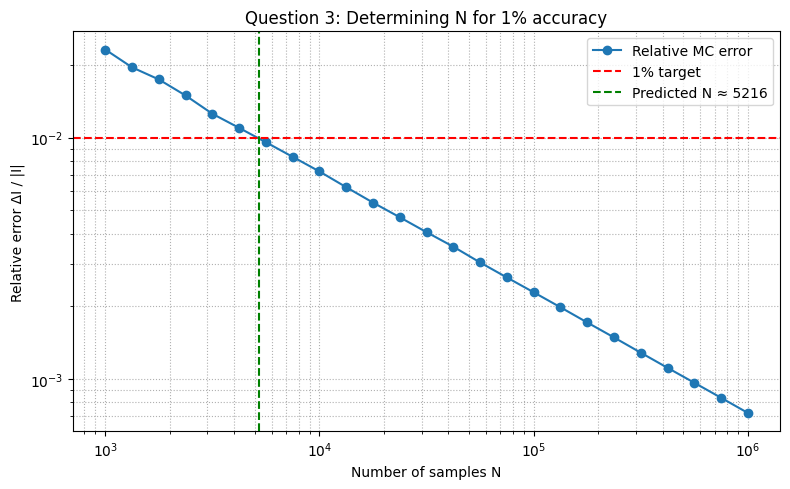

In [33]:
# Question 3: How many samples are required to achieve approximately 1% accuracy? 

import numpy as np
import matplotlib.pyplot as plt

# Group A function
def fA(x, y):
    return np.cos(np.pi * x / 2) * np.cos(np.pi * y / 2)

# --- Pilot run ---
rng = np.random.default_rng(seed=42)   # reproducible random generator
N0 = 1_000_000                         # pilot sample size

# Generate random samples
x = rng.random(N0)
y = rng.random(N0)
vals = fA(x, y)

# Monte Carlo estimate (area = 1)
I0 = np.mean(vals)

# Sample standard deviation
sf = np.std(vals, ddof=1)

# Standard error of the mean
dI0 = sf / np.sqrt(N0)

# Relative standard error
rel_se0 = dI0 / abs(I0)

# Required N for ~1% relative accuracy
N_1pct = int(np.ceil((sf / (0.01 * abs(I0)))**2))

# --- Print results ---
print("--- Question 3 Results ---")
print(f"Pilot I0 = {I0:.6f}")
print(f"Pilot relative error = {rel_se0:.6%}")
print(f"Estimated N for ~1% relative error = {N_1pct}")

# --- Sweep over N values ---
Ns = np.unique(np.logspace(3, 6, 25).astype(int))  # from 1e3 to 1e6
rel_errors = []

rng2 = np.random.default_rng(seed=2026)

for N in Ns:
    xs = rng2.random(N)
    ys = rng2.random(N)
    vs = fA(xs, ys)

    I_N = np.mean(vs)
    s = np.std(vs, ddof=1)
    rel_errors.append((s / np.sqrt(N)) / abs(I_N))

rel_errors = np.array(rel_errors)

# --- Plot ---
plt.figure(figsize=(8, 5))
plt.loglog(Ns, rel_errors, 'o-', label='Relative MC error')
plt.axhline(0.01, color='red', linestyle='--', label='1% target')
plt.axvline(N_1pct, color='green', linestyle='--',
            label=f'Predicted N ≈ {N_1pct}')
plt.xlabel('Number of samples N')
plt.ylabel('Relative error ΔI / |I|')
plt.title('Question 3: Determining N for 1% accuracy')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

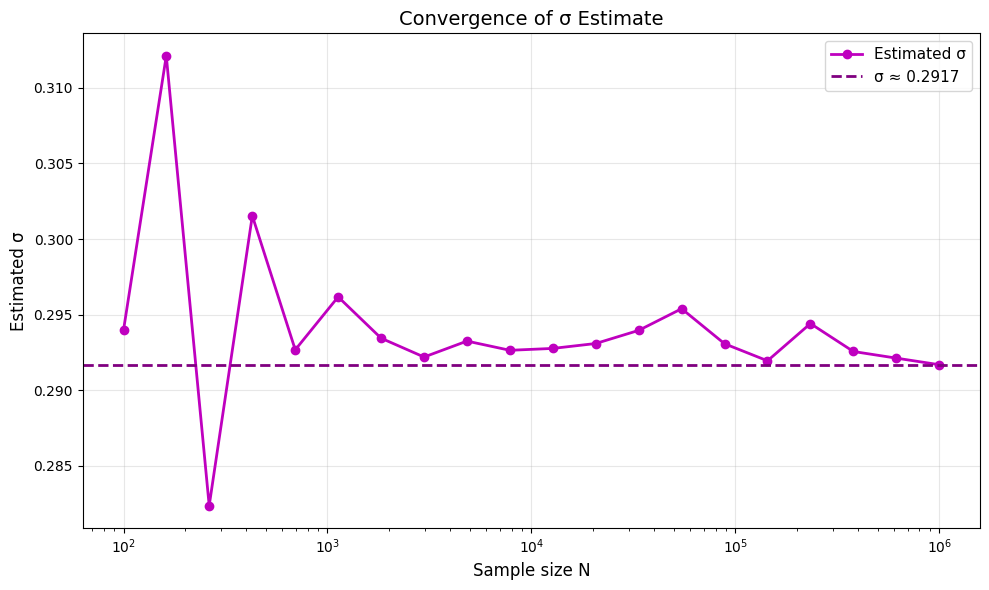

σ Estimates for Different Sample Sizes:
N =      100 → σ = 0.294000
N =      695 → σ = 0.292677
N =    4,832 → σ = 0.293253
N =   33,598 → σ = 0.293961
N =  233,572 → σ = 0.294413
Final converged σ ≈ 0.2917


In [34]:
# Question 4: Comment on the convergence behavior of your integrand.

import numpy as np
import matplotlib.pyplot as plt

# ============================================
# GROUP A: f(x,y) = cos(πx/2) cos(πy/2)
# ============================================

def f_A(x, y):
    """Group A function"""
    return np.cos(np.pi * x / 2) * np.cos(np.pi * y / 2)

# Different N values to test (logarithmically spaced)
N_values = np.logspace(2, 6, 20).astype(int)  # 100 to 1,000,000

# Estimate σ for different N to show convergence
sigma_estimates = []
for N in N_values:
    # Quick estimate of σ (limiting sample size for speed)
    sample_size = min(N, 10000)
    x_temp = np.random.uniform(0, 1, sample_size)
    y_temp = np.random.uniform(0, 1, sample_size)
    sigma_estimates.append(np.std(f_A(x_temp, y_temp)))

# Create just the σ convergence plot
plt.figure(figsize=(10, 6))

# Plot σ estimates
plt.semilogx(N_values, sigma_estimates, 'mo-', markersize=6, linewidth=2, label='Estimated σ')

# Add horizontal line at final σ value
final_sigma = sigma_estimates[-1]
plt.axhline(y=final_sigma, color='purple', linestyle='--', linewidth=2, label=f'σ ≈ {final_sigma:.4f}')

# Customize the plot
plt.xlabel('Sample size N', fontsize=12)
plt.ylabel('Estimated σ', fontsize=12)
plt.title('Convergence of σ Estimate', fontsize=14)

# Add grid
plt.grid(True, alpha=0.3)

# Add legend
plt.legend(loc='upper right', fontsize=11)

# Adjust layout
plt.tight_layout()

# Save and show
plt.savefig('sigma_convergence_plot_only.png', dpi=150)
plt.show()

# Print the σ values
print("="*60)
print("σ Estimates for Different Sample Sizes:")
print("="*60)
for i, N in enumerate(N_values):
    if i % 4 == 0:  # Print every 4th value
        print(f"N = {N:8,d} → σ = {sigma_estimates[i]:.6f}")
print("="*60)
print(f"Final converged σ ≈ {final_sigma:.4f}")